# Landmark: GEBA

GEBA is a private gymnasium in Buenos Aires. There is no particular reason for choosing this location that affected my report the opnly reason for selecting it was as it looked nice. Howver, choosing a location like this ensured that the image had a lot of different small components.

The main highlights of this report are:
1. Conducting a PCA analysis on the images.
2. Trying to find the optimal number of components that are required for a particular image.
3. Reconstructing the images using 2, 3 and the optimal number of components.
4. Plotting the 2D and 3D components on a 2D and 3D graph.

### 1. Importing images and resizing them

In [1]:
# Import all necessary moduels and libraries
from glob import glob
from PIL import Image
from resizeimage import resizeimage
import numpy as np
    
# Set a path for images
GEBA_img = glob('GEBA/*')

GEBA_flat = []

for path in GEBA_img:
    # open files
    with open(path, 'r+b') as f:
        # open image
        with Image.open(f) as image:
            # set it grayscale to make the whole process simpler and faster
            image = image.convert('L')
            # resize image to 512*512 pixels
            cover = resizeimage.resize_cover(image, [512, 512])
            # flatten the matrix
            GEBA_flat.append(np.array(cover).flatten())
# set it as array   
GEBA_flat = np.asarray(GEBA_flat)


# set X value
X = GEBA_flat

# put the data into right dimension.
X = np.stack([i for i in X])



### 2. Projecting images down to 2 and 3 Dimesnions

In [2]:
# import PCA
from sklearn.decomposition import PCA
# import Matplolib
import matplotlib.pyplot as plt

# perform 2 dimensional PCA
PCA_2D = PCA(n_components=2)
PCA_2D.fit(X)

# transform images to PCA
X_2D = PCA_2D.transform(X)

In [3]:
# perform 3 dimensional PCA
PCA_3D = PCA(n_components=3)
PCA_3D.fit(X)

# transfrom images to PCA
X_3D = PCA_3D.transform(X)

### 3. 2D plot for 2 dimension PCA and 3D plot for 3 dimension PCA

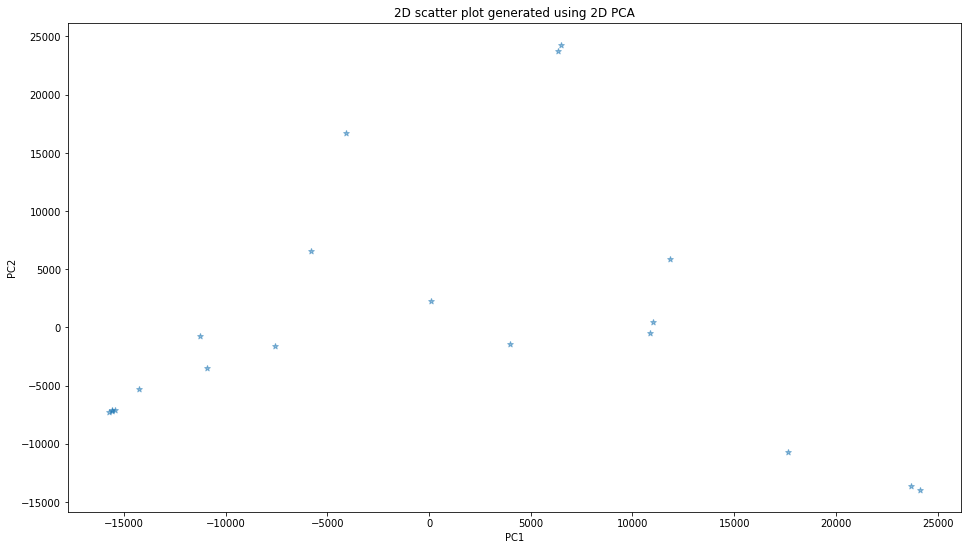

In [4]:
# transpose 2D PCA and put them into array
arr_2d = X_2D.T

fig = plt.figure(figsize = (16, 9))
ax_2d = plt.axes()


# 2D Plot
plot_2d = ax_2d.scatter(arr_2d[0], arr_2d[1], 
            alpha=0.5, 
            marker ='*')


plt.title("2D scatter plot generated using 2D PCA")
ax_2d.set_xlabel('PC1')
ax_2d.set_ylabel('PC2')
plt.show()

We can see that the PCA values are well distributed and are mainly found in clusters and that makes sense as we are using the images of the same place. There is no value that is too far off and there is always a data point that is near to others thus showing the images are somewhat related.

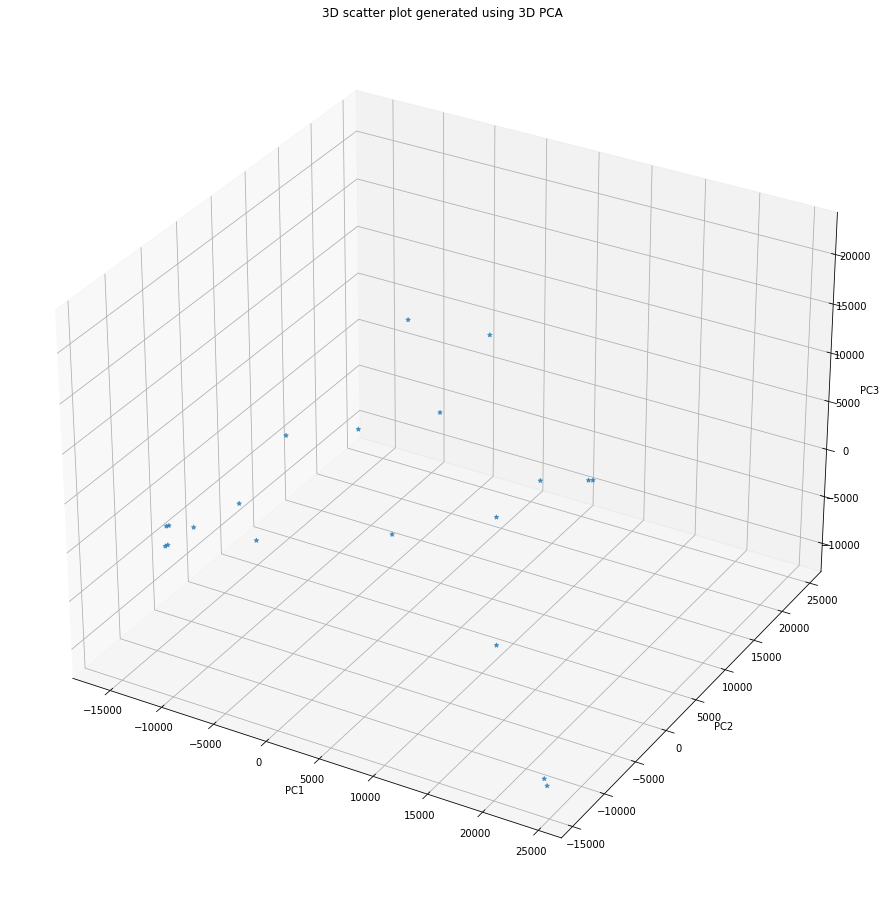

In [5]:
# transpose 3D PCA and put them into an array
arr_3d = X_3D.T

# plotting the 3D graph
fig = plt.figure(figsize = (16, 16))
ax_3d = plt.axes(projection = "3d")

 
#
plot_3d = ax_3d.scatter3D(arr_3d[0], arr_3d[1], arr_3d[2],
                    alpha = 0.7,
                    marker ='*')

plt.title("3D scatter plot generated using 3D PCA")
ax_3d.set_xlabel('PC1')
ax_3d.set_ylabel('PC2')
ax_3d.set_zlabel('PC3')
plt.show()

### 4. Reconstruction of images using 2, 3, and optimum number of components.

##### Explaining how I found the optimum number of components required to generate an image.

In the code cell below, I created a function that allows us to see the number of components that are required to generate an image that resembles the real image closely without loosing a important details. This is an extention that I personally wanted to know more about and will be discussed more in the final summary section.

In [6]:
def optimum_components(image):
    pca = PCA()
    pca.fit(image.reshape((512, 512)))
    # create an array holding the cumulative sum of variance upto each component
    var_cum = np.cumsum(pca.explained_variance_ratio_)*100
    k = np.argmax(var_cum>95)
    return k

In [7]:
def plot_reconstruction_images(images, cmap=plt.cm.gray):
    fig = plt.figure(figsize=(64,64), constrained_layout = True)
    # Adjusting the text for the plot
    # plt.text(0.1, 1.5, 'Original', fontsize=30)
    # plt.text(0.35, 1.5, '2D PCA', fontsize=30)
    # plt.text(0.6, 1.5, '3D PCA', fontsize=30)
    # plt.text(0.85, 1.5, 'Optimal PCA', fontsize=30)
    # plt.axis('off')
    # making plots based on the eigentransformations
    for i, comp in enumerate(images[0]):
        v = max(comp.max(), -comp.min())
        # show images
        fig.add_subplot(20, 6, 6*i+1)
        plt.imshow(
            comp.reshape((512, 512)),
            cmap=cmap,
            interpolation="nearest",
            vmin=-v,
            vmax=v
        )
        plt.axis('off')
        
        # reconstruct with 2 PCA components
        fig.add_subplot(20, 6, 6*i+2)
        plt.imshow(
            images[1][i].reshape((512, 512)),
            cmap=cmap,
            interpolation="nearest",
            vmin=-v,
            vmax= v,
        )
        plt.axis('off')

        # reconstruct with 3 PCA components
        fig.add_subplot(20, 6, 6*i+3)
        plt.imshow(
            images[2][i].reshape((512, 512)),
            cmap=cmap,
            interpolation="nearest",
            vmin=-v,
            vmax= v,
        )
        plt.axis('off')

        # getting the value for the optimum components for the image
        k = optimum_components(images[0][i])
        pca = PCA(n_components=k)

        # reconstruct with k (optimum) PCA components
        fig.add_subplot(20, 6, 6*i+4)
        plt.imshow(
            pca.inverse_transform(pca.fit_transform(images[0][i].reshape((512, 512)))),
            cmap=cmap,
            interpolation="nearest",
            vmin=-v,
            vmax= v,
        )
        # showing the number of optimum components each image uses in reconstruction
        plt.text(-300, 300, f'{k}', fontsize=50)
        plt.axis('off')
    plt.show()


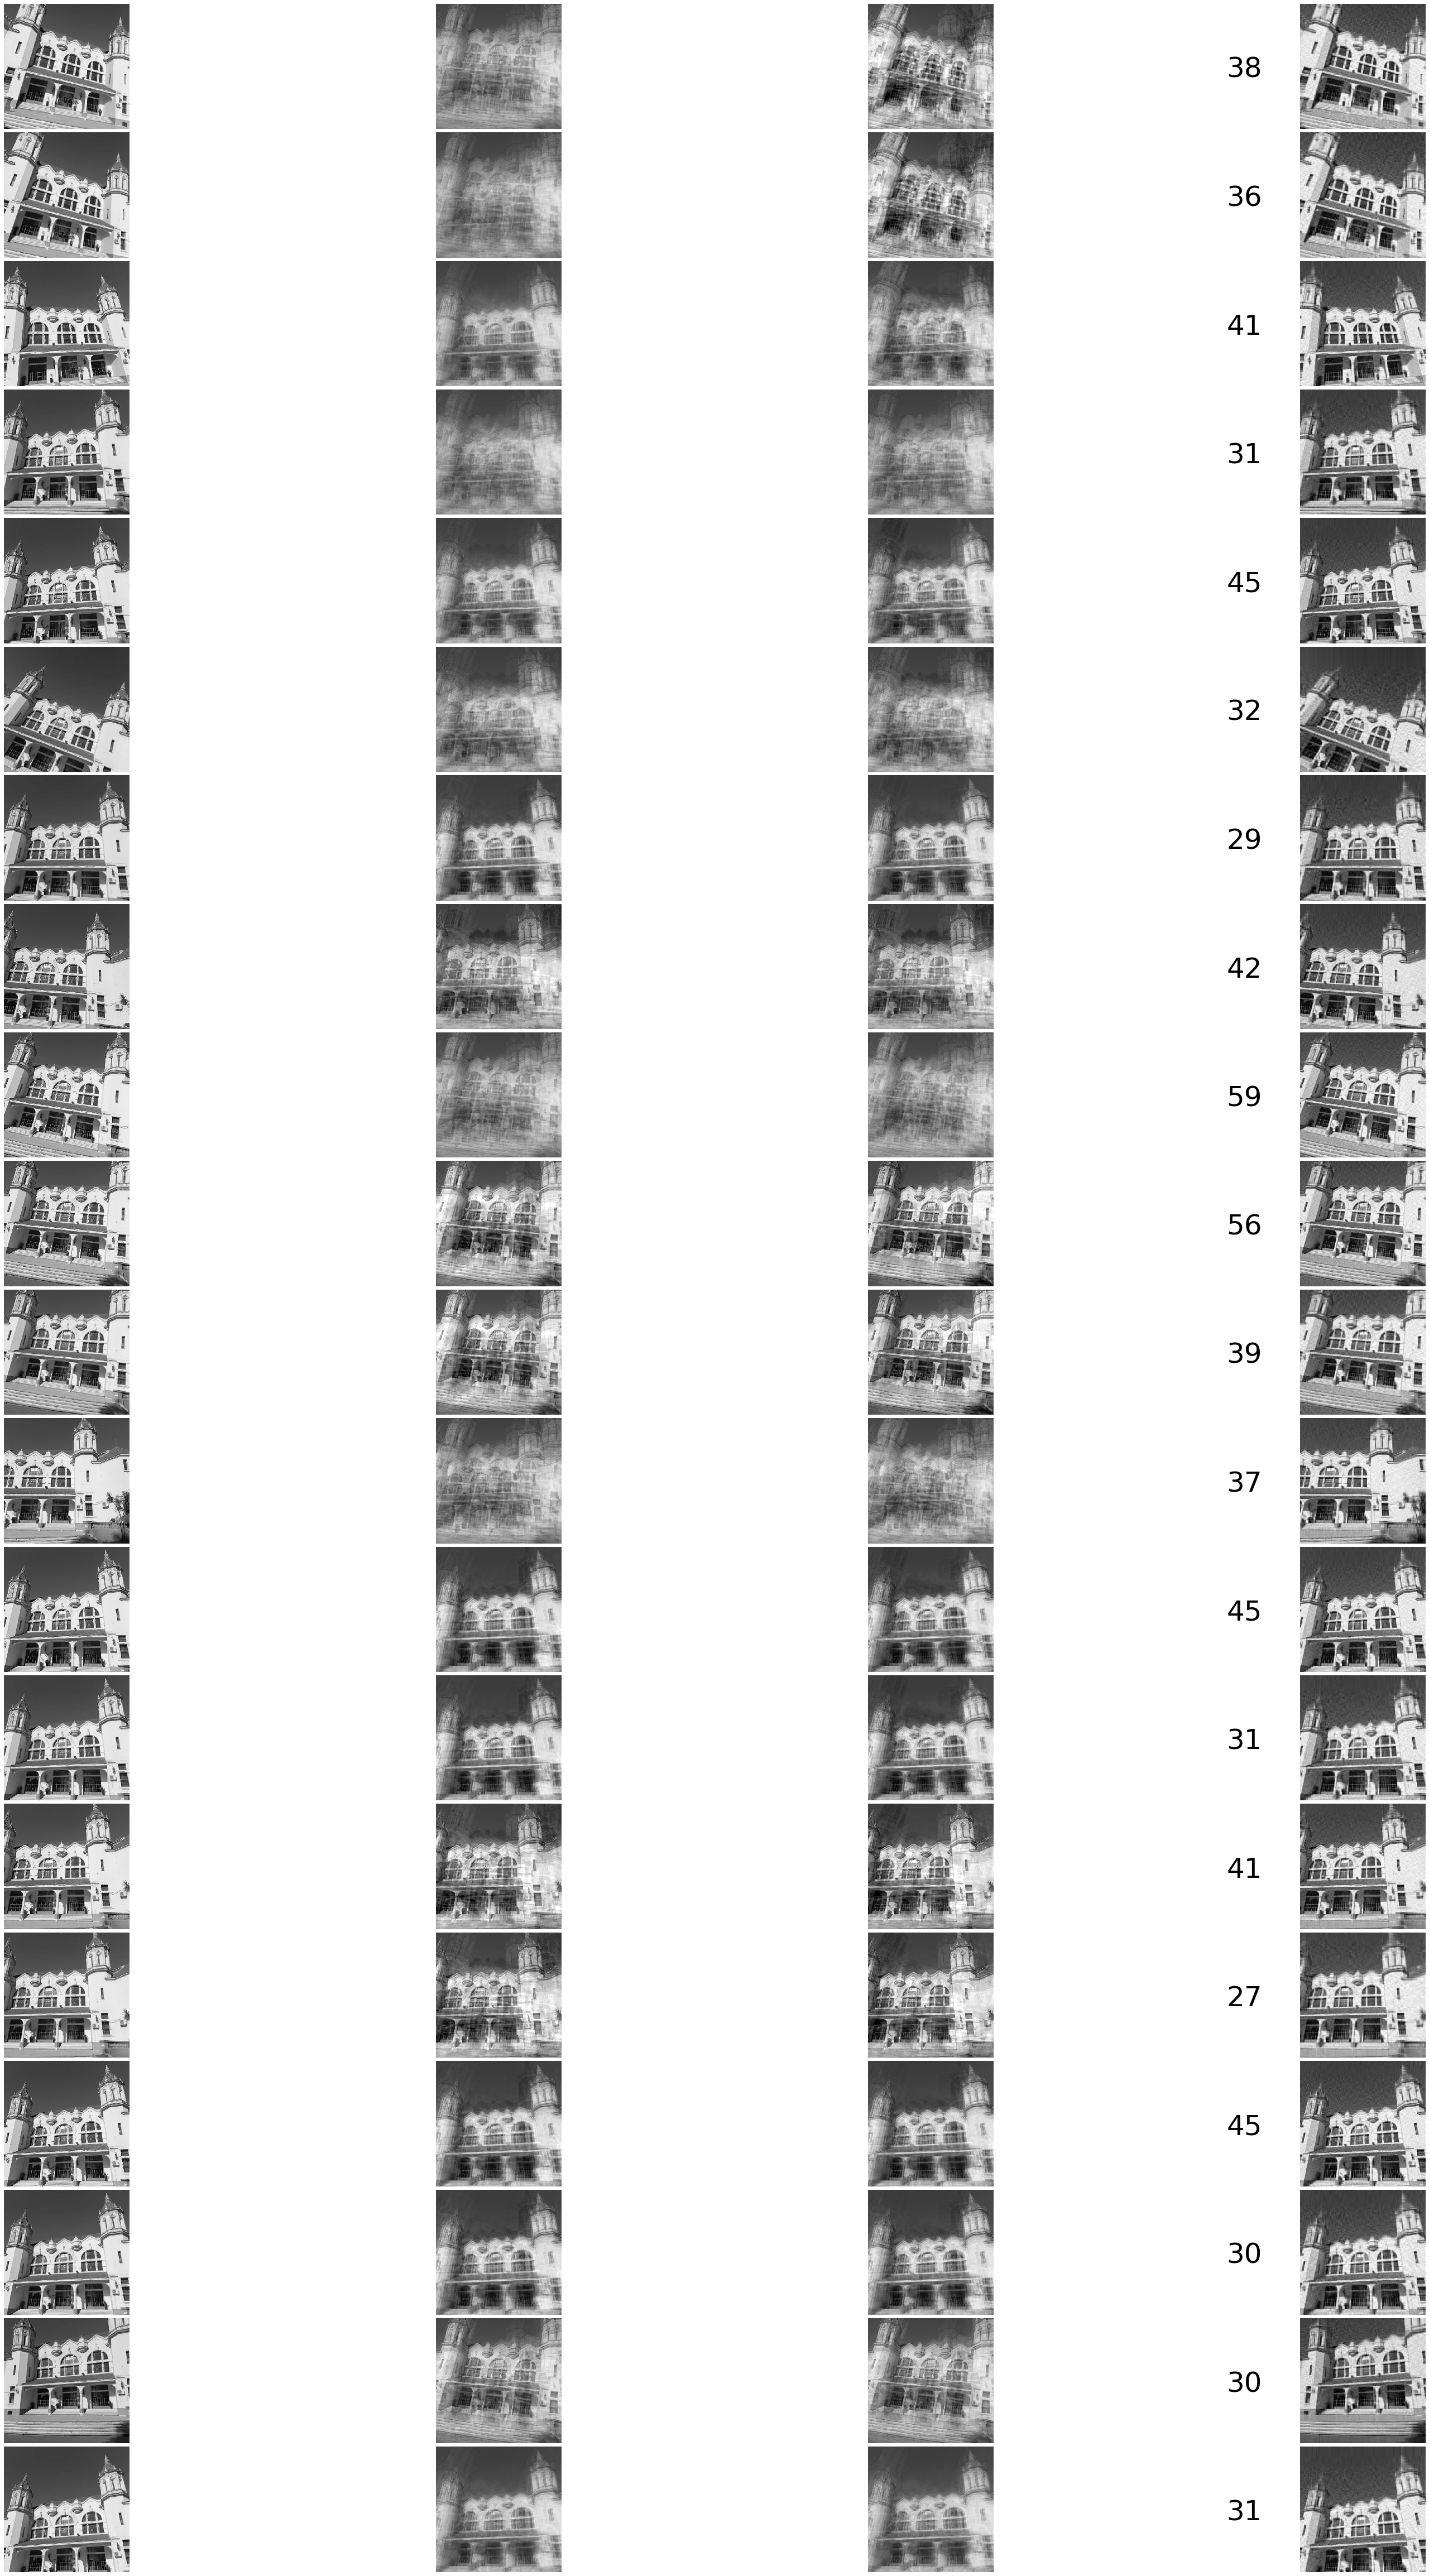

In [8]:
# Show images and their reconstruction with 2, 3 and optimal number of components
eigen_img = (X, PCA_2D.inverse_transform(X_2D), PCA_3D.inverse_transform(X_3D))
plot_reconstruction_images(eigen_img)

Figure Description: The first column represents the original image, the second column represents the image reconstructed using 2 Principal Components, the third column represents the image reconstructed using 3 Principal Components, and the fourth column represents the image reconstructed using the possibley optimum number of components which were calculated using the optimum_component function with the number of componen ts used to create that image being present on the left hand side of the image. 

We can generally see from the plot above that with increase in the components used to reconstruct the image gets better.

### 5. Choosing a faraway component and reconstructing the image using that.

For my case I looked at the extreme ends from the 2D plot of the 2 components and chose value (-15000, 25000), as I could see no images that were near to them.

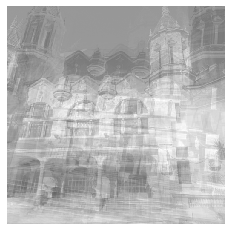

In [9]:

chosen_point = [-15000, 25000]
chosen_point_inverse = PCA_2D.inverse_transform(chosen_point)
v = max(chosen_point_inverse.max(), -chosen_point_inverse.min())
cmap=plt.cm.gray
plt.imshow(
            chosen_point_inverse.reshape((512, 512)),
            cmap=cmap,
            interpolation="nearest",
            vmin=-v,
            vmax= v,
        )
plt.axis('off')
plt.show()

### Focussing on one particular Image for a close up look

In [10]:
def plot_reconstruction_oneimage(image, add_comp, cmap=plt.cm.gray):
    fig = plt.figure(figsize=(32,10), constrained_layout = True)
    # Adjusting the text for the plot
    plt.text(0.075, 0.625, 'Original', fontsize=30)
    plt.text(0.35, 0.625, '2D PCA', fontsize=30)
    plt.text(0.6, 0.625, '3D PCA', fontsize=30)
    plt.text(0.85, 0.625, 'Optimal PCA', fontsize=30)
    plt.axis('off')
    # making plots based on the eigentransformations
    v = max(image[0].max(), -image[0].min())
    # show images
    fig.add_subplot(1, 5, 1)
    plt.imshow(
        image[0].reshape((512, 512)),
        cmap=cmap,
        interpolation="nearest",
        vmin=-v,
        vmax=v
    )
    plt.axis('off')
        
    # reconstruct with 2 PCA components
    fig.add_subplot(1, 5, 2)
    plt.imshow(
        image[1].reshape((512, 512)),
        cmap=cmap,
        interpolation="nearest",
        vmin=-v,
        vmax= v,
    )
    plt.axis('off')

    # reconstruct with 3 PCA components
    fig.add_subplot(1, 5, 3)
    plt.imshow(
        image[2].reshape((512, 512)),
        cmap=cmap,
        interpolation="nearest",
        vmin=-v,
        vmax= v,
    )
    plt.axis('off')

    # getting the value for the optimum components for the image
    k = optimum_components(image[0])
    pca = PCA(n_components=k)

    # reconstruct with k (optimum) PCA components
    fig.add_subplot(1, 5, 4)
    plt.imshow(
        pca.inverse_transform(pca.fit_transform(image[0].reshape((512, 512)))),
        cmap=cmap,
        interpolation="nearest",
        vmin=-v,
        vmax= v,
    )
    # showing the number of optimum components each image uses in reconstruction
    plt.text(206, 550, f'{k} components', fontsize=20)
    plt.axis('off')

    # using a higher number of components as comapred to the calculated optimum
    pca = PCA(n_components=k+add_comp)
    fig.add_subplot(1, 5, 5)
    plt.imshow(
        pca.inverse_transform(pca.fit_transform(image[0].reshape((512, 512)))),
        cmap=cmap,
        interpolation="nearest",
        vmin=-v,
        vmax= v,
    )
    # showing the number of optimum components each image uses in reconstruction
    plt.text(206, 550, f'{k+add_comp} components', fontsize=20)
    plt.axis('off')
plt.show()


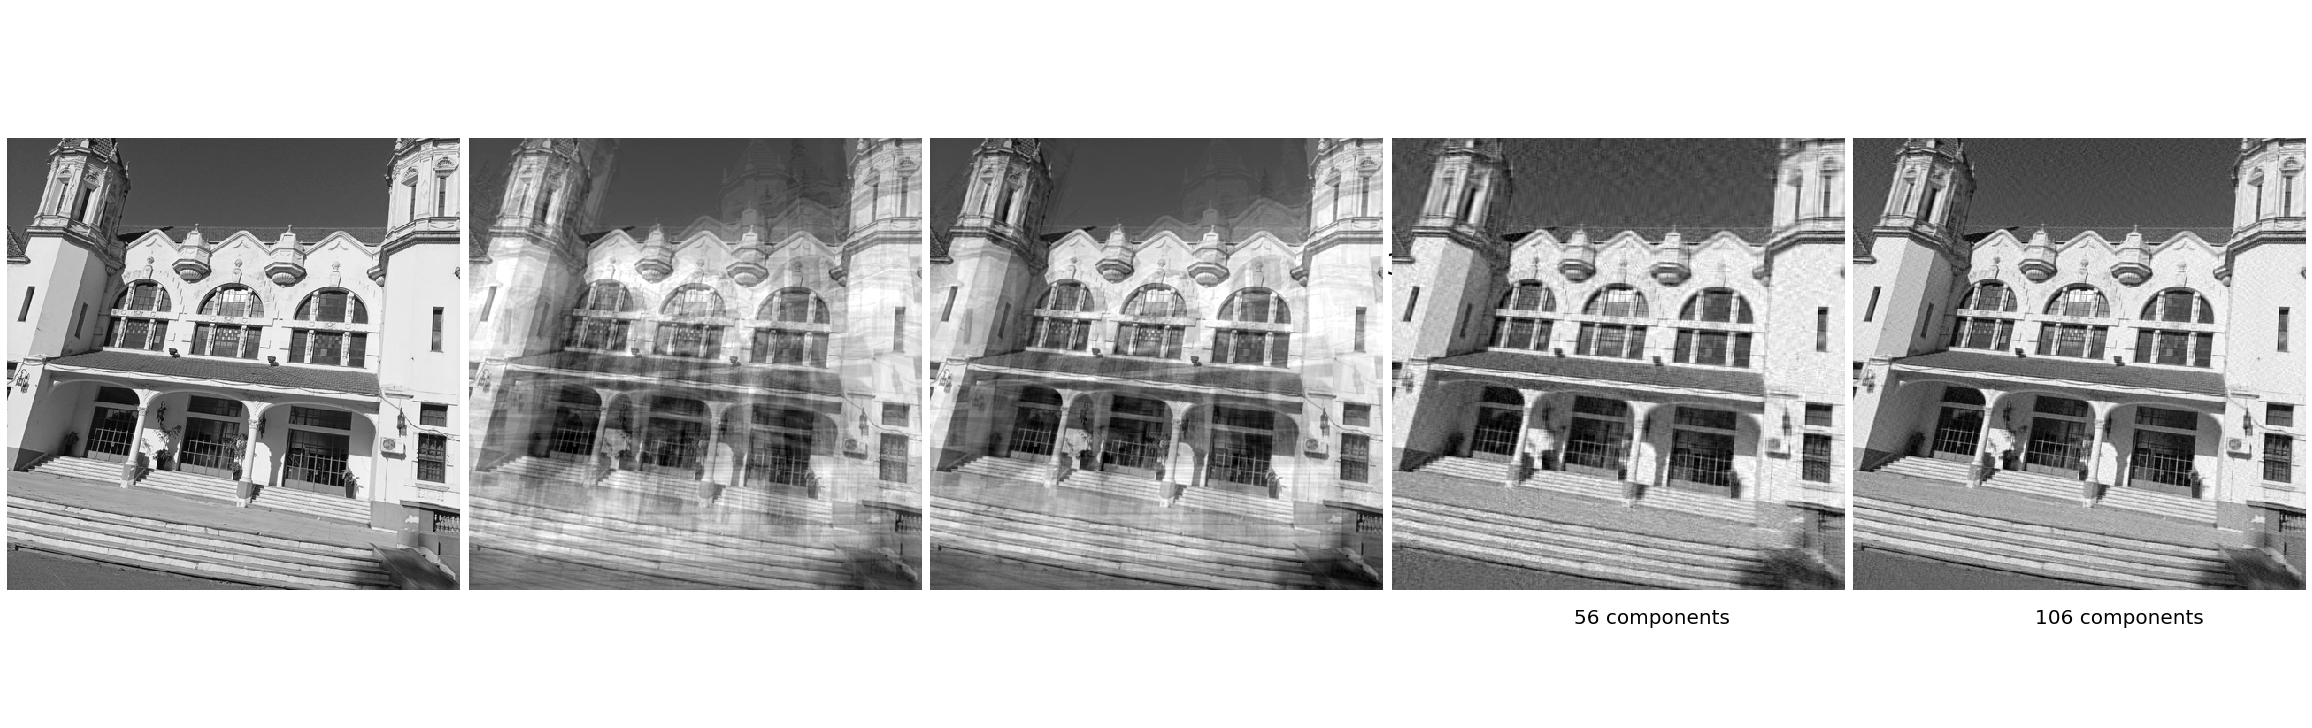

In [11]:
# choose which image number you want to look at
img_num = 9
# number added to the calculataed optimum component count
n = 50
# show image and its reconstruction with 2, 3 and optimal number of components
eigen_img = (X[img_num], PCA_2D.inverse_transform(X_2D[img_num]), PCA_3D.inverse_transform(X_3D[img_num]))
plot_reconstruction_oneimage(eigen_img, n)

### General Summary:

From this whole report we can see that we can deconstruct the image to its principal components, which can define a paricualr aspect of the image, maybe the shade, or the lines, and than reconstructthe image only using a limited number of these components. As seen in this assignmnet this reconstruction was done using 2 components, 3 components, and through a calculation using presuamably the optimum number of components. 

From the reconstructions that we get from 2 and 3 components we can see that there is a general hint of the original image but the reconstruction is pretty bad. However, by using the optimum number of components, which we get through calcualting variance of the components, we can see that this image is pretty close to the original image, and mainly dropping details that are not that much necessary. Thus, by conducting writing up this code and conducting some further research I found out how PCA can be used to compress images into smaller file size while minimizng the loss in quality. 

I also plotted the image using 50 more components than my calculated optimal component value and through the visualziations we can see that the difference in image quality is soimewhat negligible. I admit the graininess in the sky for the image with higher components is better, however, if we focus on the building their quality is more or less the same. Thus, I think my way of compressing image is effective, however, I feel like it can still be improved, by selectively choosing the optimal components instead of depending on the count , and by also taking into consideration the colors.